# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder. In this lab we will explore categorical data.

### Instructions

1. Import the necessary libraries if you are starting a new notebook.
2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.
3. Plot a correlation matrix, what can you see?
4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
5. What can you see in the plots?
6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
7. Have you found outliers? If you have, what should we do with them?
8. Check nan values per column.
9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
11. Get categorical features.
12. What should we do with the customer id column?

### Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

### Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [2]:
continuous_data = pd.read_csv('continuous_data.csv')

In [3]:
discrete_data = pd.read_csv('discrete_data.csv')

In [4]:
continuous_data = continuous_data.drop(columns=['Unnamed: 0'])

In [5]:
discrete_data = discrete_data.drop(columns=['Unnamed: 0'])

In [6]:
numericals_data = pd.read_csv('numericals_data.csv')

In [7]:
numericals_data = numericals_data.drop(columns=['Unnamed: 0'])

In [8]:
numericals_data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### Plot a correlation matrix, what can you see?

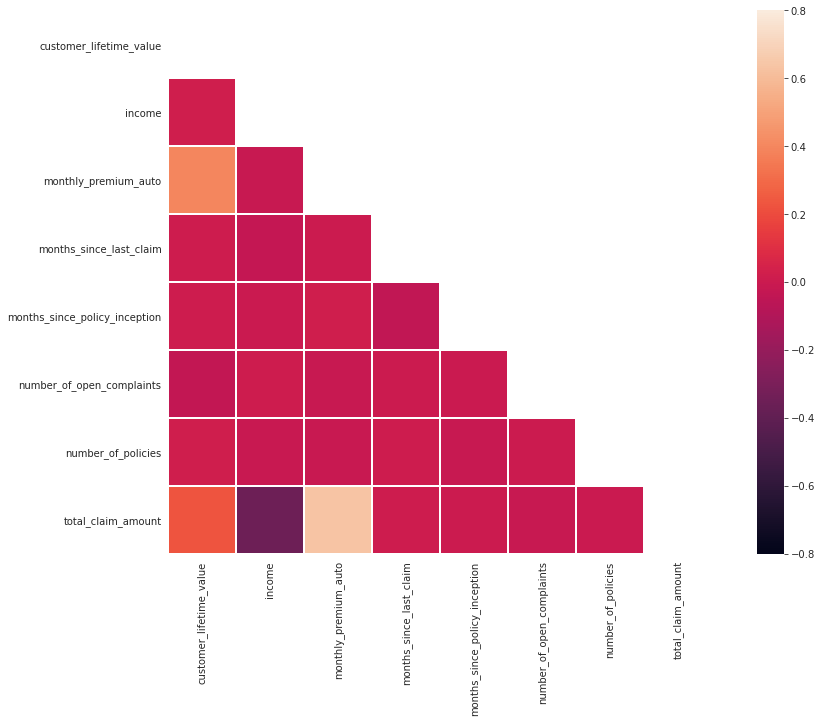

In [9]:
#2. Plot a correlation matrix, what can you see?

mask = np.zeros_like(numericals_data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals_data.corr(), mask=mask,
                     square=True, linewidths=1, 
                     vmax = 0.8, vmin = -0.8)

### Create function to print barplots from discrete data


In [10]:
# Create function to print barplots from discrete data

def df_bar(discrete_data):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(discrete_data):
        plt.figure(i)
        sns.barplot(x = discrete_data[col].value_counts().index, y = discrete_data[col].value_counts())
        
    plt.show()

#The enumerate() method adds counter to an iterable and returns it (the enumerate object).


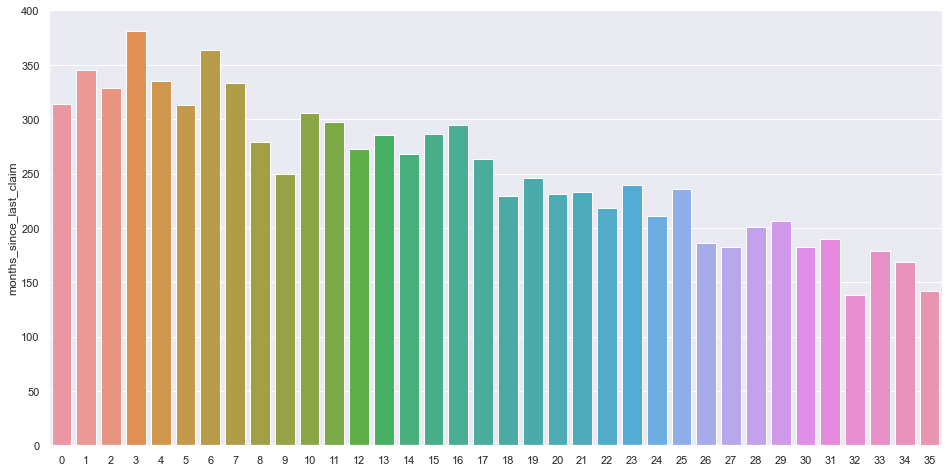

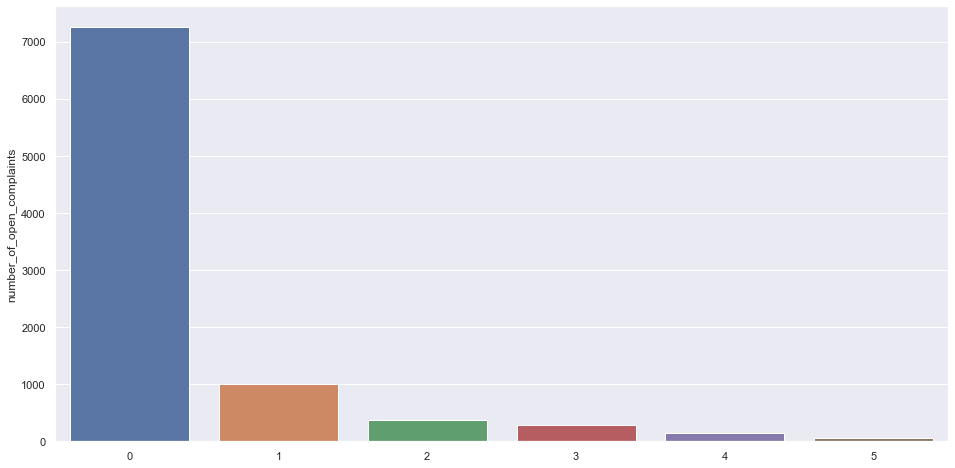

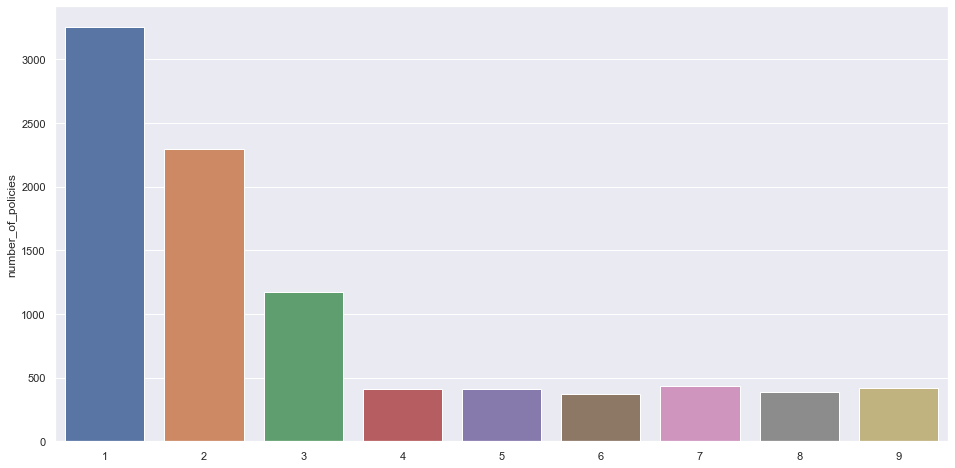

In [11]:

df_bar(discrete_data)

In [12]:
# Continuous

def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col])
        
    plt.show()

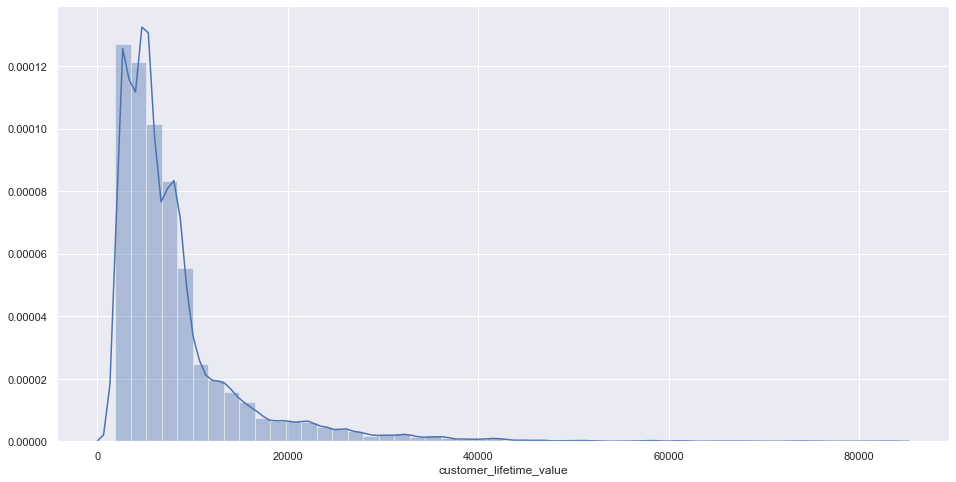

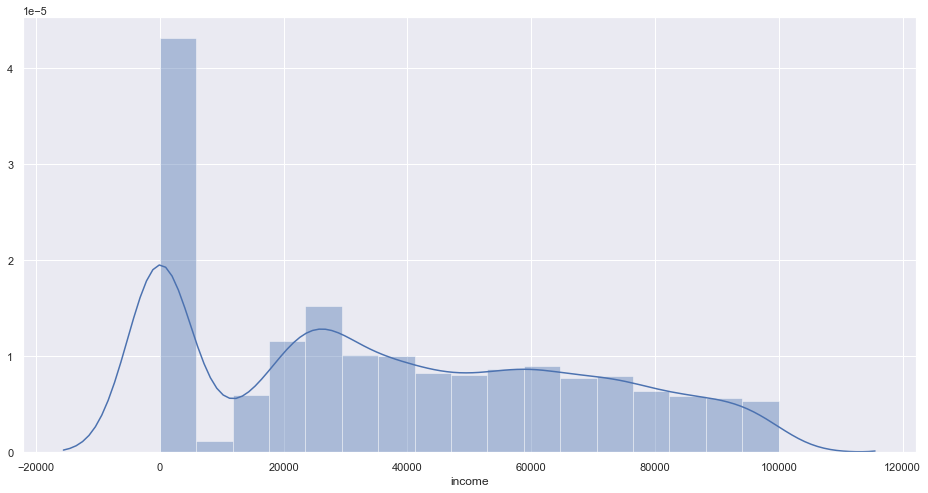

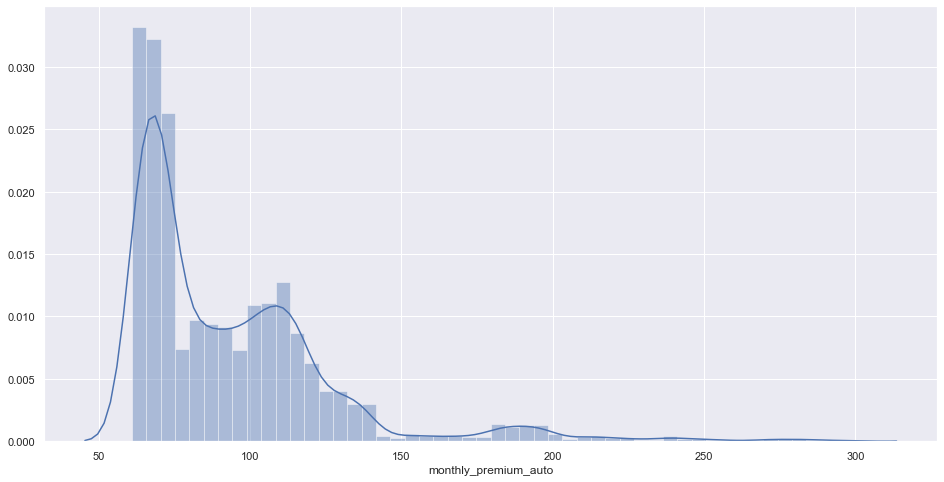

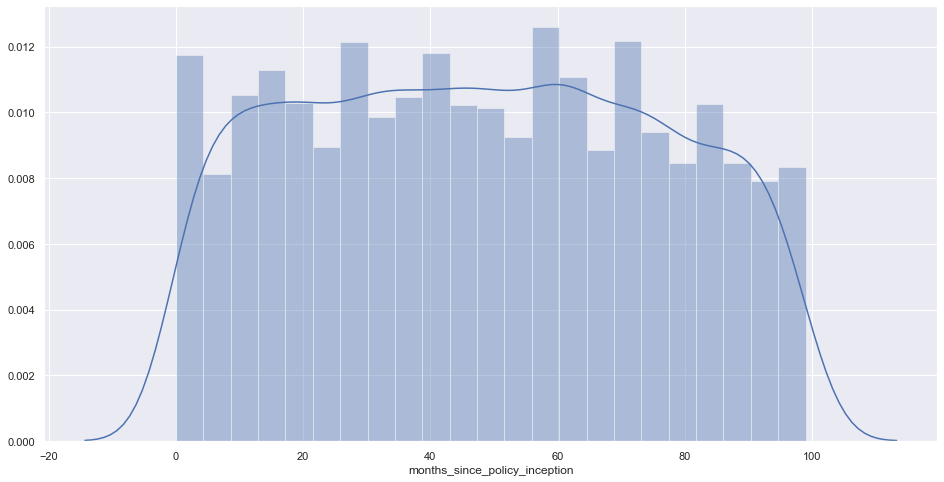

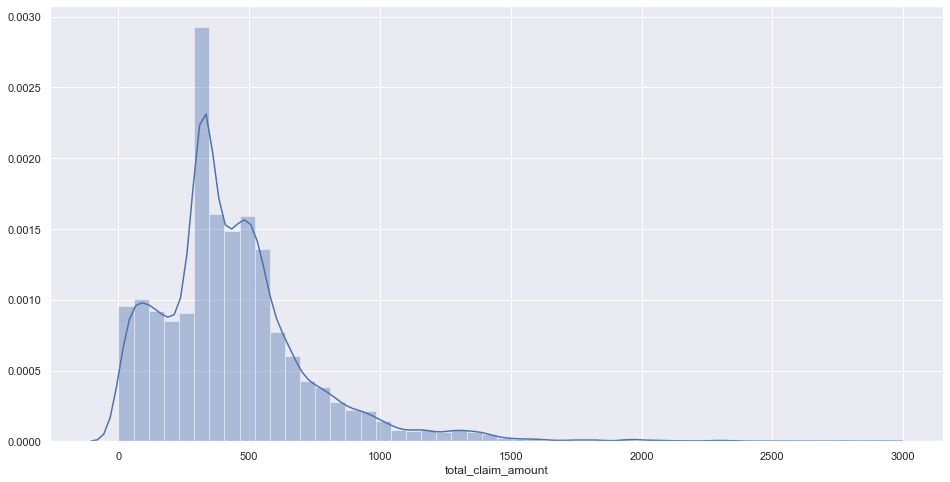

In [13]:
df_hist(continuous_data)

IndexError: index 3 is out of bounds for axis 0 with size 3

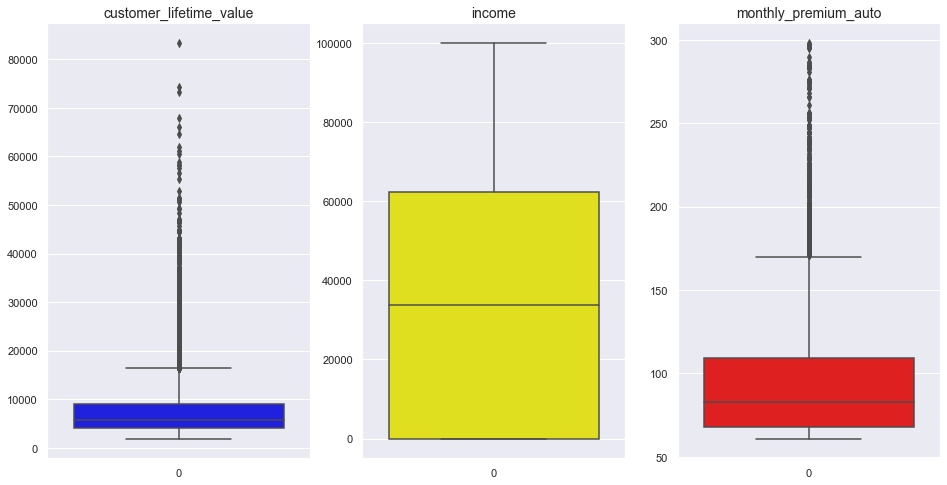

In [14]:
# Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.


box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous_data[:3]):
    sns.boxplot(data = continuous_data[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

In [17]:
continuous_data[:3]

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247


In [18]:
continuous_data["customer_lifetime_value"].value_counts()

2538.626320     6
8564.768226     6
4270.034394     6
4904.894731     6
11638.899470    6
               ..
20314.440950    1
2816.758764     1
13045.370880    1
3440.361969     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [19]:
continuous_data["income"].value_counts()            #lots of zeros here!

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: income, Length: 5694, dtype: int64

In [20]:
continuous_data["monthly_premium_auto"].value_counts()

65     348
66     307
71     304
73     302
63     289
      ... 
231      1
209      1
204      1
268      1
284      1
Name: monthly_premium_auto, Length: 202, dtype: int64

### Check nan values per column.

In [21]:
#Check NaNs Total
continuous_data.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_policy_inception    0
total_claim_amount               0
dtype: int64

In [22]:
# Check NaNs (Percentage)
continuous_data.isna().sum()/len(continuous_data)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_policy_inception    0.0
total_claim_amount               0.0
dtype: float64

### Get categorical features.

In [23]:
categorical_data = pd.read_csv('categorical_df.csv')

In [24]:
categorical_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9134 non-null   int64 
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: int64(1), object(14)
memory usage: 1.0+ MB


In [25]:
categorical_data = categorical_data.drop(columns=['Unnamed: 0'])

In [26]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


In [27]:
categorical_data.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
